# 공분산

In [ ]:
# 공분산(covariance): 두 변수가 함께 변화하는 정도를 나타내는 지표

In [ ]:
# 두 개의 데이터 x와 y가 있을 때

# x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
# y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

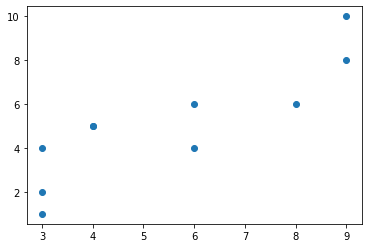

In [1]:
#산점도로 나타내기. 가로축은 x, 세로축은 y를 나타냄.

x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

In [2]:
# np.cov를 사용하면 x의 분산, y의 분산과 함께 x와 y의 공분산을 계산

import numpy as np

np.cov(x, y)

array([[6.05555556, 5.61111111],
       [5.61111111, 6.98888889]])

In [3]:
#공분산만 보고자 한다면 아래와 같이 함

np.cov(x, y)[0, 1]

5.61111111111111

In [ ]:
# 엑셀자료의 경우 

# 상관계수(correlation coefficient):

In [ ]:
#  상관계수 : 두 변수가 함께 변하는 정도를 -1 ~ 1 범위의 수로 나타낸 것

# 피어슨 상관계수
# 칼 피어슨(Karl Pearson)이 개발한 상관계수

In [ ]:
# 두 개의 데이터 x와 y가 있을 때

# x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
# y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

In [5]:
import numpy as np

np.corrcoef(x, y)

array([[1.        , 0.86251728],
       [0.86251728, 1.        ]])

In [6]:
np.corrcoef(x, y)[0, 1]

0.8625172792135779

In [7]:
# 아래와 같은 원리로 계산

cov = np.cov(x, y)[0, 1]  # 공분산
xsd = np.std(x, ddof=1)   # x의 표본표준편차
ysd = np.std(y, ddof=1)   # y의 표본표준편차

cov / ( xsd * ysd )

0.8625172792135778

In [ ]:


# 히트맵으로 보여 주기

In [ ]:
# 엑셀자료의 경우

In [ ]:
# spearman 상관계수
# 상관분석을 실시함에 있어 서열척도 를 사용한 변수가 포함되어 있거나
# 등간/비율척도를 사용한 변수들이라 하더라도, 두 변수 간의 관계가 비선형적 일 때 구하는 상관계수


In [8]:
import scipy.stats
scipy.stats.spearmanr(x, y).correlation

0.9000703207408192

In [ ]:
# kendall의 tau
# spearman의 상관계수와 마찬가지로, 비선형적 관게이거나 서열변수일 때 사용
# spearman의 상관계수보다 믿을만 한 것으로 알려짐 (특히 표본이 작을 때)

In [9]:
scipy.stats.kendalltau(x, y).correlation

0.8153742483272113

# 상관계수의 통계적 검증

In [ ]:
# 상관분석
# 우리가 구한 상관계수는 표본에서 구한 것
# 동일한 모집단에서도 표본에 따라 상관계수가 달라질 수 있음

In [ ]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

In [10]:
#두 변수의 피어슨 상관계수와 p 값을 계산

import scipy.stats

scipy.stats.pearsonr(x, y)

(0.862517279213578, 0.0013196539142000013)

In [ ]:
# 상관계수는 0.86이고 p 값은 0.001.

# p값은 모집단에서 상관계수가 0일 때, 현재와 같은 크기의 표본에서 관찰된 상관계수(여기서는 0.86)보다 더 극단적인 상관계수가 관찰될 확률
# 보통 0.05(5%)와 같은 임계치를 정하고, p값이 그보다 작을 경우 "통계적으로 유의미하다"라고 함.


# 스피어만 과 켄달 상관계수

In [ ]:
# stats.spearmanr(x1, x2)

In [ ]:
## stats.kendalltau(x1, x2)

In [2]:
import numpy as np

x = np.random.randint(0,100, 50)
y = x * 2

In [3]:
import pandas as pd

df = pd.DataFrame({'x':x, 'y':y})
df.corr()

,x,y
x,1.0,1.0
y,1.0,1.0


In [4]:
from scipy import stats

stats.pearsonr(x, y)

(1.0, 0.0)

In [ ]:
# https://www.infoking.site/139  자료 인용
# 생산자 물가지수와 소비자 물가지수 간의 시차별 상관관계 구하기

In [ ]:
# coding=utf-8
 
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
 
 
import json
 
dif_month=1
 
def index_corr(produce_kr,consumer_kr,dif_month):
    num_del=produce_kr.index.max()-dif_month
    produce_kr_rel=produce_kr[produce_kr.index<=num_del]
 
    consumer_kr_rel = consumer_kr[consumer_kr.index >= dif_month]
    consumer_kr_rel=consumer_kr_rel.reset_index(drop=True)
 
    produce_kr_rel=produce_kr_rel.rename(columns={"DATA_VALUE":"produce_index"})
    consumer_kr_rel = consumer_kr_rel.rename(columns={"DATA_VALUE": "consume_index"})
 
    total=pd.concat([produce_kr_rel[["produce_index"]],consumer_kr_rel[["consume_index"]]],1)
 
    pd.scatter_matrix(total)
    print(str(dif_month)+"개월 상관계수:"+str(total.corr().iloc[0,1]))
 
    plt.figure()
    # plt.plot(produce_kr_rel.index,produce_kr_rel["produce_index"])
    # plt.plot(consumer_kr_rel.index, consumer_kr_rel["consume_index"])
 
    plt.scatter(total["produce_index"],consumer_kr_rel["consume_index"])
 
    return
 
if __name__ == "__main__":
    key =[자신의 인증키를 넣는다]
 
    # https://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp?t=guideServiceDtl&apiCode=OA-1040&menuGroup=MENU000004
    # 여기서 주소 만들면 쉽다.
    url="http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/1000/I02Y001/MM/201501/201805/?/?/?/"
    result = urlopen(url)
    html = result.read()
    data = json.loads(html)
    data=data["StatisticSearch"]["row"]
    produce = pd.DataFrame(data)
    produce_kr=produce[produce["ITEM_CODE1"]=="KOR"]
    # produce_kr=produce_kr.set_index("TIME")
    produce_kr["DATA_VALUE"]=produce_kr["DATA_VALUE"].astype("float")
 
    produce_kr["DATA_VALUE"].plot()
 
    produce_kr["TIME"] = produce_kr["TIME"].astype("int")
 
    # produce_kr["date"] = datetime.datetime(produce_kr["TIME"].str[0:4],produce_kr["TIME"].str[4:5])
    # produce_kr["date"] = produce_kr["TIME"].apply(lambda x: datetime.datetime.strptime(x, '%Y%m'))
 
    produce_kr["TIME"] = produce_kr["TIME"].astype("str")
    xlabel=produce_kr["TIME"]
    xlabel = xlabel.drop_duplicates()
 
    produce_kr=produce_kr.sort_values("TIME")
    produce_kr=produce_kr.reset_index(drop=True)
    produce_kr = produce_kr.reset_index()
 
    # plt.scatter(produce_kr["index"],produce_kr["DATA_VALUE"])
    # plt.xticks(produce_kr["index"], xlabel,rotation=70)
    #
    # plt.plot(produce_kr["index"],produce_kr["DATA_VALUE"])
    # plt.xticks(produce_kr["index"], xlabel,rotation=70)
 
 
    # 소비자 물가지수
    url="http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/1000/I02Y002/MM/201501/201805/?/?/?/"
    result = urlopen(url)
    html = result.read()
    data = json.loads(html)
    data=data["StatisticSearch"]["row"]
    consumer = pd.DataFrame(data)
    consumer_kr=consumer[consumer["ITEM_CODE1"]=="KOR"]
    # produoce_kr=produce_kr.set_index("TIME")
    consumer_kr["DATA_VALUE"]=consumer_kr["DATA_VALUE"].astype("float")
 
    consumer_kr=consumer_kr.sort_values("TIME")
    consumer_kr=consumer_kr.reset_index(drop=True)
    consumer_kr = consumer_kr.reset_index()
    #
    # plt.plot(cunsumer_kr["index"],cunsumer_kr["DATA_VALUE"])
 
    index_corr(produce_kr,consumer_kr,0)
    index_corr(produce_kr,consumer_kr,1)$
    index_corr(produce_kr,consumer_kr,2)
    index_corr(produce_kr,consumer_kr,3)
    index_corr(produce_kr,consumer_kr,4)
    index_corr(produce_kr,consumer_kr,5)
    index_corr(produce_kr,consumer_kr,6)
    index_corr(produce_kr,consumer_kr,7)
    index_corr(produce_kr,consumer_kr,8)
    index_corr(produce_kr,consumer_kr,9)
    index_corr(produce_kr,consumer_kr,10)